# Dataset 
## 1. Link of the dataset is as follows :-https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++ .

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset into a dataframe

df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
df.shape

(246, 14)

### we can see row number 122 and 123 have some headings so we should remove those and reset index.

In [4]:
df.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [5]:
df.drop([122,123],inplace=True)

In [6]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

### All the attributes are of type object

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


### Some name have spaces so we remove those spaces in the names of the columns.

In [8]:
df.columns 

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [9]:
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

### change the datatype of numerical columns to float or int

In [10]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Ws']=df['Ws'].astype(float)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(6), int32(5), object(3)
memory usage: 22.0+ KB


### There is null value in classes column

In [12]:
df.isna().sum() 

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

### we can drop that out.

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


### We see that the year 2012 is only present in the entire dataset so we can drop that column

In [16]:
df['year'].unique()

array([2012])

In [20]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [21]:
df['month'].unique()

array([6, 7, 8, 9])

In [18]:
df.drop('year',axis=1,inplace=True)

In [19]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


### Classes is a categorical value so we should encode it.

In [22]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

#### There are some extra spaces so we can remove them

In [23]:
df['Classes'] = df['Classes'].str.replace(" ", "")

In [24]:
df['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [25]:
df['Classes']=df['Classes'].map({'notfire':0,'fire':1})

In [26]:
df['Classes'].unique()

array([0, 1], dtype=int64)

In [27]:
df['FWI'] = df['FWI'].astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   Temperature  243 non-null    int32  
 3   RH           243 non-null    int32  
 4   Ws           243 non-null    float64
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    object 
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    int64  
dtypes: float64(7), int32(4), int64(1), object(1)
memory usage: 30.9+ KB


In [29]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [30]:
numerical_features

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'ISI',
 'BUI',
 'FWI',
 'Classes']

In [31]:
categorical_features

['DC']

In [32]:
df.var()

<ipython-input-32-28ded241fd7c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


day             78.190729
month            1.242764
Temperature     13.162670
RH             219.874333
Ws               7.903887
Rain             4.012837
FFMC           205.912204
DMC            153.587434
ISI             17.257659
BUI            202.447968
FWI             55.362048
Classes          0.246948
dtype: float64

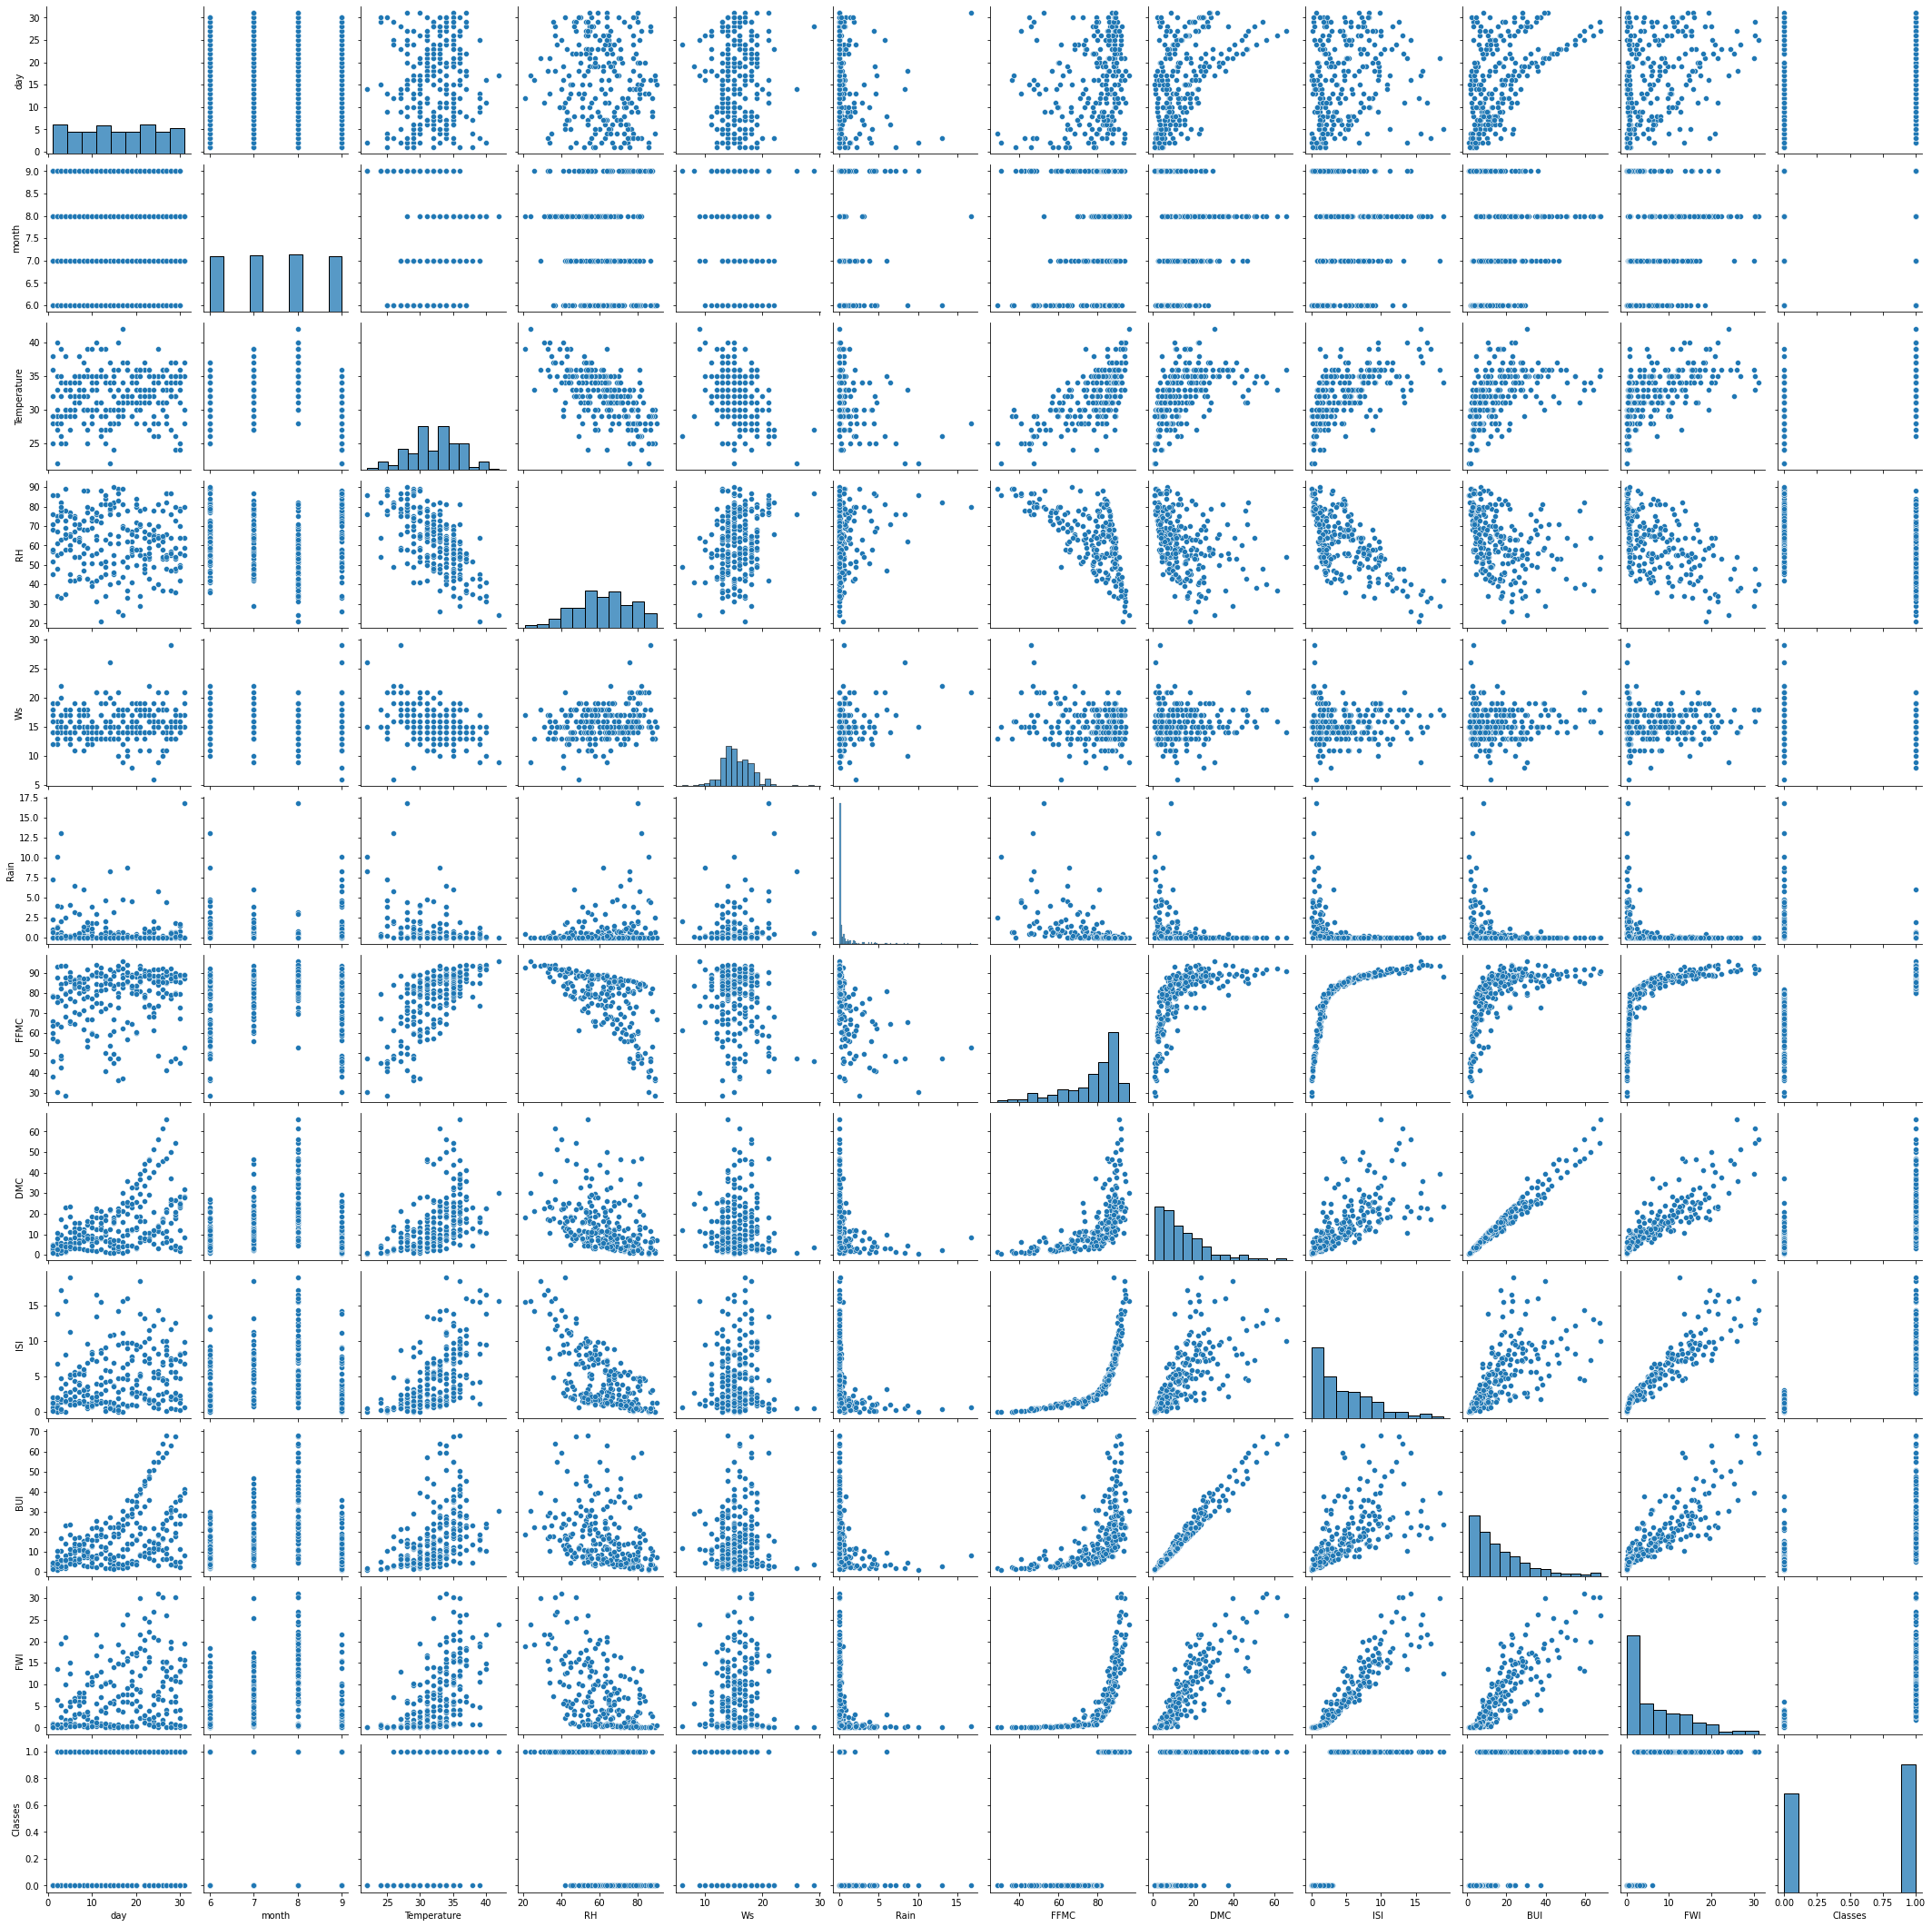

In [33]:
sns.pairplot(df)

In [34]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,FWI,Classes
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.180543,0.517117,0.350781,0.202840
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.065608,0.085073,0.082639,0.024004
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.603871,0.459789,0.566670,0.516015
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.686667,-0.353841,-0.580957,-0.432161
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.008532,0.031438,0.032368,-0.069964
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.740007,0.592011,0.691132,0.769492
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.680454,0.982248,0.875864,0.585658
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,1.000000,0.644093,0.922895,0.735197
BUI,0.517117,0.085073,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.644093,1.000000,0.857973,0.586639


<AxesSubplot:>

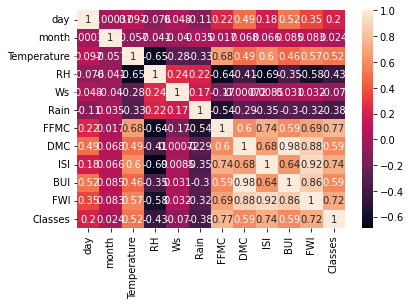

In [35]:
sns.heatmap(df.corr(), annot=True)

#### from above we can see that DMC and BUI are highly +vely corelated so We can drop any of those columns.

In [36]:
df_new = df.drop('DMC',axis=1)

In [37]:
df_new

,day,month,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18.0,0.0,65.7,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13.0,1.3,64.4,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22.0,13.1,47.1,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13.0,2.5,28.6,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16.0,0.0,64.8,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14.0,0.0,85.4,44.5,4.5,16.9,6.5,1
240,27,9,28,87,15.0,4.4,41.1,8,0.1,6.2,0.0,0
241,28,9,27,87,29.0,0.5,45.9,7.9,0.4,3.4,0.2,0
242,29,9,24,54,18.0,0.1,79.7,15.2,1.7,5.1,0.7,0


<AxesSubplot:>

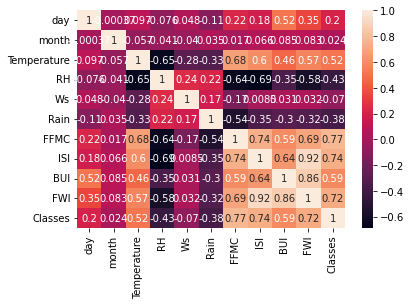

In [38]:
sns.heatmap(df_new.corr(), annot=True)

### Boxplot to detect Outliers in the features

<AxesSubplot:>

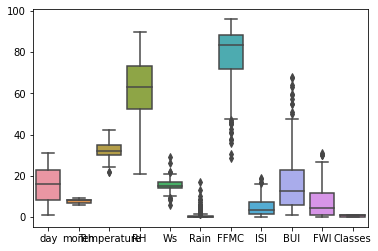

In [39]:
sns.boxplot(data = df_new,orient="v")

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

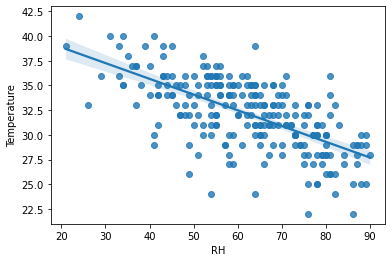

In [40]:
sns.regplot(x = "RH", y = "Temperature", data = df_new)

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

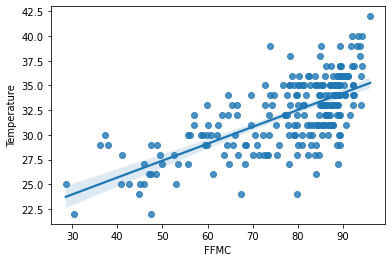

In [41]:
sns.regplot(x="FFMC",y="Temperature",data=df_new)

In [42]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   Temperature  243 non-null    int32  
 3   RH           243 non-null    int32  
 4   Ws           243 non-null    float64
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DC           243 non-null    object 
 8   ISI          243 non-null    float64
 9   BUI          243 non-null    float64
 10  FWI          243 non-null    float64
 11  Classes      243 non-null    int64  
dtypes: float64(6), int32(4), int64(1), object(1)
memory usage: 29.0+ KB


In [43]:
df_new.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18.0,0.0,65.7,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13.0,1.3,64.4,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22.0,13.1,47.1,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13.0,2.5,28.6,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16.0,0.0,64.8,14.2,1.2,3.9,0.5,0


### Model Training and evaluation

In [55]:
y = df_new['Temperature']

In [56]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 243, dtype: int32

In [58]:
x = df_new.drop('Temperature',axis=1)

In [59]:
x

,day,month,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI,Classes
0,1,6,57,18.0,0.0,65.7,7.6,1.3,3.4,0.5,0
1,2,6,61,13.0,1.3,64.4,7.6,1.0,3.9,0.4,0
2,3,6,82,22.0,13.1,47.1,7.1,0.3,2.7,0.1,0
3,4,6,89,13.0,2.5,28.6,6.9,0.0,1.7,0.0,0
4,5,6,77,16.0,0.0,64.8,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,65,14.0,0.0,85.4,44.5,4.5,16.9,6.5,1
240,27,9,87,15.0,4.4,41.1,8,0.1,6.2,0.0,0
241,28,9,87,29.0,0.5,45.9,7.9,0.4,3.4,0.2,0
242,29,9,54,18.0,0.1,79.7,15.2,1.7,5.1,0.7,0


In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.20, random_state =46)

In [61]:
X_train

,day,month,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI,Classes
105,14,9,76,26.0,8.3,47.4,7,0.4,1.6,0.1,0
239,26,9,65,14.0,0.0,85.4,44.5,4.5,16.9,6.5,1
224,11,9,73,14.0,0.0,79.2,16.6,2.1,6.6,1.2,0
223,10,9,74,15.0,1.1,59.5,8.2,0.8,4.6,0.3,0
8,9,6,88,13.0,0.2,52.9,38.8,0.4,10.5,0.3,0
...,...,...,...,...,...,...,...,...,...,...,...
187,5,8,42,17.0,0.1,88.3,52.5,19.0,23.5,12.6,1
116,25,9,81,21.0,5.8,48.6,7.7,0.4,3.0,0.1,0
40,11,7,76,14.0,0.0,81.1,18.7,2.6,8.1,2.2,0
69,9,8,59,17.0,0.0,87.4,57,6.9,17.9,9.9,1


In [62]:
X_train.shape

(194, 11)

In [63]:
Y_train

105    22
239    30
224    30
223    29
8      25
       ..
187    34
116    26
40     33
69     35
190    37
Name: Temperature, Length: 194, dtype: int32

In [64]:
Y_train.shape

(194,)

In [65]:
X_test

,day,month,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI,Classes
81,21,8,58,19.0,0.0,88.6,141.1,9.2,38.8,18.4,1
143,22,6,46,14.0,1.1,78.3,8.3,1.9,7.7,1.2,0
48,19,7,59,17.0,0.0,88.1,52.8,7.7,18.2,10.9,1
89,29,8,48,18.0,0.0,90.1,220.4,12.5,67.4,30.2,1
161,10,7,51,16.0,3.8,77.5,9.5,2.0,7.7,1.3,0
5,6,6,67,14.0,0.0,82.6,22.2,3.1,7.0,2.5,1
12,13,6,84,21.0,1.2,50.0,17,0.5,6.7,0.2,0
136,15,6,90,15.0,0.0,66.8,14.7,1.2,7.1,0.6,0
26,27,6,53,18.0,0.0,89.0,80.3,9.2,25.8,15.0,1
240,27,9,87,15.0,4.4,41.1,8,0.1,6.2,0.0,0


In [66]:
X_test.shape

(49, 11)

In [67]:
Y_test.shape

(49,)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
X_train = scaler.fit_transform(X_train)      

In [72]:
X_test = scaler.transform(X_test)

In [73]:
X_train

array([[-0.1390451 ,  1.38564097,  0.95663708, ..., -1.08317587,
        -0.94000934, -1.13241024],
       [ 1.19854579,  1.38564097,  0.21428671, ...,  0.06741019,
        -0.04257328,  0.8830722 ],
       [-0.47344282,  1.38564097,  0.75417789, ..., -0.70716736,
        -0.78576252, -1.13241024],
       ...,
       [-0.47344282, -0.44926926,  0.95663708, ..., -0.5943648 ,
        -0.64553813, -1.13241024],
       [-0.69637464,  0.46818586, -0.19063168, ...,  0.14261189,
         0.43418963,  0.8830722 ],
       [-0.80784055,  0.46818586, -0.39309087, ..., -0.37627986,
        -0.12670791,  0.8830722 ]])

In [74]:
X_test

array([[ 6.41216253e-01,  4.68185856e-01, -2.58118077e-01,
         1.22520663e+00, -3.84763765e-01,  7.50603844e-01,
         2.09886807e+00,  1.07432285e+00,  1.71432748e+00,
         1.62609689e+00,  8.83072202e-01],
       [ 7.52682160e-01, -1.36672437e+00, -1.06795485e+00,
        -5.19948188e-01,  1.32292831e-01,  5.62900763e-02,
        -8.62930576e-01, -6.65080396e-01, -6.24445482e-01,
        -7.85762517e-01, -1.13241024e+00],
       [ 4.18284437e-01, -4.49269256e-01, -1.90631680e-01,
         5.27144702e-01, -3.84763765e-01,  7.16899293e-01,
         1.29539604e-01,  7.16911223e-01,  1.65172400e-01,
         5.74414012e-01,  8.83072202e-01],
       [ 1.53294351e+00,  4.68185856e-01, -9.32982052e-01,
         8.76175666e-01, -3.84763765e-01,  8.51717500e-01,
         3.86747224e+00,  1.86062843e+00,  3.86509619e+00,
         3.28074463e+00,  8.83072202e-01],
       [-5.84908732e-01, -4.49269256e-01, -7.30522859e-01,
         1.78113739e-01,  1.40143175e+00,  2.36279333e-03,
  

### Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
Lreg = LinearRegression()

In [77]:
Lreg.fit(X_train,Y_train)

LinearRegression()

In [79]:
## print the Coefficients
print(Lreg.coef_)

[-0.39309041 -0.29528207 -1.02161981 -0.52792464 -0.0383188   1.24053991
  0.83645065  0.43014514 -0.21802676  0.03389655  0.11899208]


In [80]:
## print the intercept
print(Lreg.intercept_)

32.25257731958763


In [81]:
## Prediction for the Test data
reg_pred = Lreg.predict(X_test)

In [82]:
reg_pred

array([34.42919669, 32.75745585, 33.54662778, 36.48255657, 32.21667053,
       33.02983509, 26.90414166, 28.95908189, 34.33331099, 25.37319276,
       31.26288469, 31.53553906, 36.91341571, 32.92114778, 28.91509386,
       34.10410028, 34.38969494, 29.80078683, 34.54406297, 30.44744915,
       32.84541587, 36.33721475, 30.71868269, 35.7050526 , 30.18607358,
       33.6690524 , 29.98468928, 29.39937289, 36.18326944, 34.43038568,
       28.90488704, 29.39072067, 31.65402686, 31.95253149, 35.27395395,
       30.31445327, 33.50427628, 31.83595922, 33.61656176, 35.18685   ,
       33.13619687, 37.39018291, 33.65143284, 29.65862537, 31.22049819,
       37.04180422, 31.74940976, 30.86105581, 29.49809645])

In [83]:
Y_test

81     36
143    33
48     35
89     35
161    34
5      31
12     27
136    28
26     34
240    28
227    28
9      28
206    35
86     31
115    29
112    31
228    32
52     27
236    35
215    28
183    38
149    37
221    30
212    34
51     28
10     31
4      27
138    31
196    37
71     35
17     31
243    24
176    39
36     35
85     35
111    28
226    29
43     34
142    32
84     34
180    34
229    33
110    29
219    34
96     29
208    33
11     26
175    33
141    31
Name: Temperature, dtype: int32

#### Assumption of Linear Regression.

Text(0, 0.5, 'Test Predicted Data')

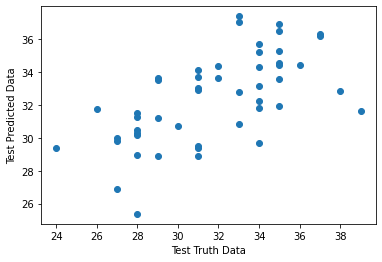

In [84]:
## Relationship Between Real Data & Predicted Data
plt.scatter(Y_test,reg_pred)          
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")      

In [85]:
## Calculating Residual
residuals = Y_test - reg_pred

In [86]:
residuals

81     1.570803
143    0.242544
48     1.453372
89    -1.482557
161    1.783329
5     -2.029835
12     0.095858
136   -0.959082
26    -0.333311
240    2.626807
227   -3.262885
9     -3.535539
206   -1.913416
86    -1.921148
115    0.084906
112   -3.104100
228   -2.389695
52    -2.800787
236    0.455937
215   -2.447449
183    5.154584
149    0.662785
221   -0.718683
212   -1.705053
51    -2.186074
10    -2.669052
4     -2.984689
138    1.600627
196    0.816731
71     0.569614
17     2.095113
243   -5.390721
176    7.345973
36     3.047469
85    -0.273954
111   -2.314453
226   -4.504276
43     2.164041
142   -1.616562
84    -1.186850
180    0.863803
229   -4.390183
110   -4.651433
219    4.341375
96    -2.220498
208   -4.041804
11    -5.749410
175    2.138944
141    1.501904
Name: Temperature, dtype: float64

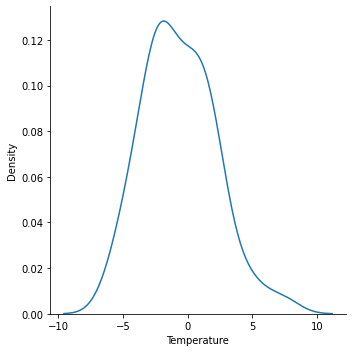

In [87]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals, kind ="kde")

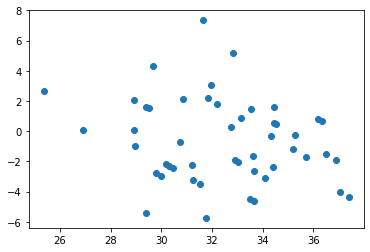

In [88]:
## Scatter Plot with predictions and residual
### Uniform Distributions
plt.scatter(reg_pred, residuals)

### Performance Metrics

In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(Y_test, reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test, reg_pred)))

7.950002340100109
2.314286071593273
2.8195748509482965


In [91]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
score

0.3249414479211925

In [92]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.1242483648707362

In [94]:
## Ridge Regression 
from sklearn.linear_model import Ridge
ridge=Ridge()

In [95]:
ridge.fit(X_train,Y_train)

Ridge()

In [96]:
## print the coefficients
print(ridge.coef_)

[-0.3890495  -0.29056758 -1.02079557 -0.52381915 -0.04722017  1.22076401
  0.78248601  0.42368003 -0.15846398  0.02936829  0.12953831]


In [97]:
## print the intercept
print(ridge.intercept_)

32.25257731958763


In [98]:
## Prediction for the Test data
ridge_pred = ridge.predict(X_test)

In [99]:
ridge_pred

array([34.41124294, 32.75403762, 33.54237926, 36.48430485, 32.20342414,
       33.01796532, 26.93396308, 28.96739306, 34.32427013, 25.42167614,
       31.27272902, 31.51441449, 36.93945651, 32.94116849, 28.93331547,
       34.10451811, 34.38858716, 29.78936182, 34.5463258 , 30.43869807,
       32.82879634, 36.34929597, 30.72225151, 35.65178925, 30.18093676,
       33.65421879, 29.97820394, 29.39031297, 36.17653167, 34.42401792,
       28.91242695, 29.40340942, 31.66467815, 31.93333276, 35.2749521 ,
       30.33007017, 33.50321281, 31.8272097 , 33.61147952, 35.17958846,
       33.14804469, 37.37369766, 33.64635713, 29.6402881 , 31.21715759,
       37.08373611, 31.74152826, 30.87965411, 29.50782817])

In [100]:
Y_test

81     36
143    33
48     35
89     35
161    34
5      31
12     27
136    28
26     34
240    28
227    28
9      28
206    35
86     31
115    29
112    31
228    32
52     27
236    35
215    28
183    38
149    37
221    30
212    34
51     28
10     31
4      27
138    31
196    37
71     35
17     31
243    24
176    39
36     35
85     35
111    28
226    29
43     34
142    32
84     34
180    34
229    33
110    29
219    34
96     29
208    33
11     26
175    33
141    31
Name: Temperature, dtype: int32

Text(0, 0.5, 'Test Predicted Data')

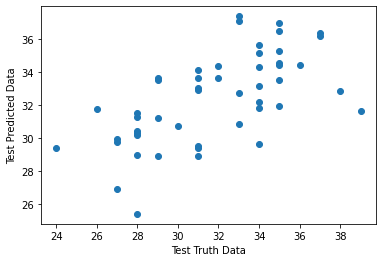

In [101]:
## Relationship Between Real Data & Predicted Data.
plt.scatter(Y_test,ridge_pred)   
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [102]:
##  Calculating residuals
residuals=Y_test- ridge_pred

In [103]:
residuals

81     1.588757
143    0.245962
48     1.457621
89    -1.484305
161    1.796576
5     -2.017965
12     0.066037
136   -0.967393
26    -0.324270
240    2.578324
227   -3.272729
9     -3.514414
206   -1.939457
86    -1.941168
115    0.066685
112   -3.104518
228   -2.388587
52    -2.789362
236    0.453674
215   -2.438698
183    5.171204
149    0.650704
221   -0.722252
212   -1.651789
51    -2.180937
10    -2.654219
4     -2.978204
138    1.609687
196    0.823468
71     0.575982
17     2.087573
243   -5.403409
176    7.335322
36     3.066667
85    -0.274952
111   -2.330070
226   -4.503213
43     2.172790
142   -1.611480
84    -1.179588
180    0.851955
229   -4.373698
110   -4.646357
219    4.359712
96    -2.217158
208   -4.083736
11    -5.741528
175    2.120346
141    1.492172
Name: Temperature, dtype: float64

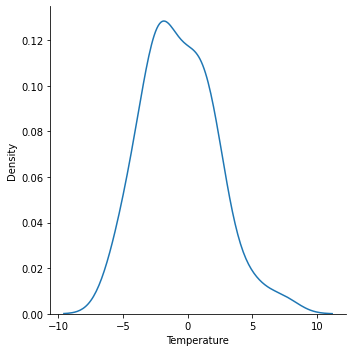

In [104]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals,kind="kde")

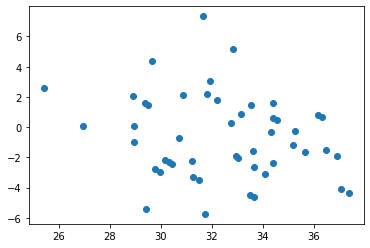

In [105]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(ridge_pred,residuals)

In [106]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test,ridge_pred))
print(mean_absolute_error(Y_test,ridge_pred))
print(np.sqrt(mean_squared_error(Y_test,ridge_pred)))

7.948071783446804
2.3123811134152046
2.819232481269823


In [107]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test,ridge_pred)
print(score)

0.32510537727911404


In [108]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.12446102998371555

In [109]:
## Lasso Regression
from sklearn.linear_model import Lasso

In [110]:
lasso = Lasso()

In [111]:
lasso.fit(X_train,Y_train)

Lasso()

In [112]:
## print the coefficients
print(lasso.coef_)

[ 0.         -0.         -0.56924992 -0.         -0.          1.24513822
  0.          0.04686371  0.          0.          0.        ]


In [113]:
## print the Intercept
print(lasso.intercept_)

32.25257731958763


In [114]:
## Prediction for the Test data
lasso_pred = lasso.predict(X_test)

In [115]:
lasso_pred

array([33.3844633 , 32.89943132, 33.28733021, 33.93137923, 32.64131791,
       32.46699658, 29.0486442 , 30.23604628, 33.61011989, 28.18191825,
       32.11043082, 31.19692118, 34.48006287, 32.33086765, 31.32571234,
       33.39013385, 33.63609028, 31.28225228, 33.47588709, 31.85039122,
       32.67004821, 34.54646975, 31.65073742, 33.76829006, 31.21929112,
       32.71335355, 30.56759512, 30.65558399, 34.3708099 , 33.19411078,
       29.86051943, 31.27684539, 31.82129748, 32.36066904, 33.32164372,
       31.93026731, 33.72909629, 31.94829065, 33.25137344, 33.17691035,
       33.28398029, 35.1144758 , 33.46600049, 30.7706815 , 32.00523307,
       34.53692264, 32.06565384, 31.78136367, 30.36911688])

In [116]:
Y_test

81     36
143    33
48     35
89     35
161    34
5      31
12     27
136    28
26     34
240    28
227    28
9      28
206    35
86     31
115    29
112    31
228    32
52     27
236    35
215    28
183    38
149    37
221    30
212    34
51     28
10     31
4      27
138    31
196    37
71     35
17     31
243    24
176    39
36     35
85     35
111    28
226    29
43     34
142    32
84     34
180    34
229    33
110    29
219    34
96     29
208    33
11     26
175    33
141    31
Name: Temperature, dtype: int32

Text(0, 0.5, 'Test Predicted Data')

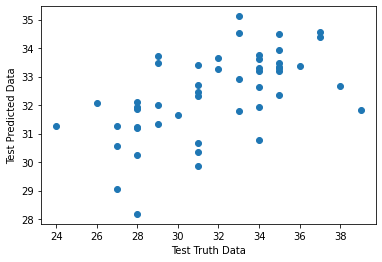

In [117]:
## Relationship Between Real Data & Predicted Data.
plt.scatter(Y_test,lasso_pred)        ## IF we get Linear Manner , it is good Linear Model.
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [118]:
# Calculating residuals
residuals=Y_test- lasso_pred

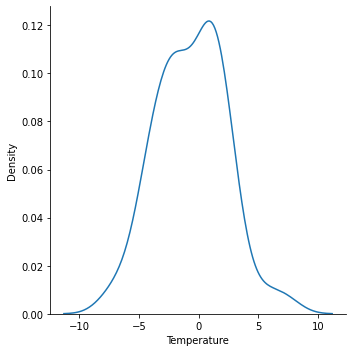

In [119]:
# Distribution of residual are Approximately Normal Distribution
sns.displot(residuals,kind="kde")

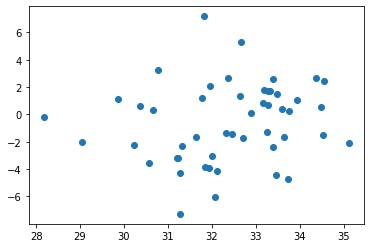

In [120]:
# SCatter plot with predictions and residual
##uniform distribution

plt.scatter(lasso_pred,residuals)

In [121]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test, lasso_pred))
print(mean_absolute_error(Y_test, lasso_pred))
print(np.sqrt(mean_squared_error(Y_test, lasso_pred)))

8.602713548716657
2.3872137322679707
2.933038279449598


In [122]:
## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test, lasso_pred)
print(score)

0.2695177807869328


In [123]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.052347391291155954

In [124]:
## Elastic Net Regression
from sklearn.linear_model import ElasticNet

In [125]:
elastic = ElasticNet()

In [126]:
elastic.fit(X_train, Y_train)

ElasticNet()

In [128]:
# print the coefficients
print(elastic.coef_)

[-0.         -0.         -0.62280978 -0.11557508 -0.03807425  0.73891823
  0.          0.29711951  0.09454547  0.21526611  0.22779994]


In [129]:
# print the Intercepts
print(elastic.intercept_)

32.25257731958763


In [130]:
# Prediction for the Test data
elastic_pred = elastic.predict(X_test)

In [131]:
elastic_pred

array([33.87350842, 32.33060203, 33.40819964, 35.20203605, 31.96169631,
       32.26016202, 28.90322453, 29.81582962, 33.94886693, 28.48067885,
       31.96445755, 30.77321351, 35.63325952, 32.60341506, 30.78424319,
       33.5692139 , 33.84300726, 30.75154693, 33.94233623, 31.0901872 ,
       32.06964388, 35.28626051, 31.37930457, 34.27067027, 30.69680147,
       32.65872248, 30.19650566, 30.26798598, 34.95093576, 33.48692779,
       29.7811678 , 30.91059454, 31.50438055, 31.66883879, 34.06535137,
       31.72185579, 33.81250302, 31.4877635 , 33.15934129, 33.98529609,
       33.4365431 , 35.98907737, 33.61546864, 30.37807709, 31.69468008,
       35.8709805 , 31.87504624, 31.33864215, 30.21885814])

Text(0, 0.5, 'Test Predicted Data')

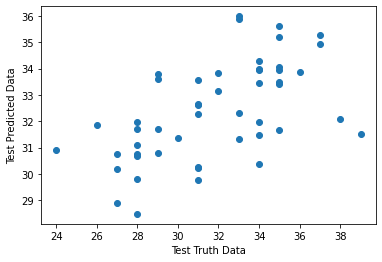

In [132]:
## Relation Between Real Data and Predicted Data
plt.scatter(Y_test,elastic_pred)     ## IF we get Linear Manner , it is good Linear Model.
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [133]:
## Calculating residuals
residuals=Y_test- elastic_pred

In [134]:


residuals



81     2.126492
143    0.669398
48     1.591800
89    -0.202036
161    2.038304
5     -1.260162
12    -1.903225
136   -1.815830
26     0.051133
240   -0.480679
227   -3.964458
9     -2.773214
206   -0.633260
86    -1.603415
115   -1.784243
112   -2.569214
228   -1.843007
52    -3.751547
236    1.057664
215   -3.090187
183    5.930356
149    1.713739
221   -1.379305
212   -0.270670
51    -2.696801
10    -1.658722
4     -3.196506
138    0.732014
196    2.049064
71     1.513072
17     1.218832
243   -6.910595
176    7.495619
36     3.331161
85     0.934649
111   -3.721856
226   -4.812503
43     2.512237
142   -1.159341
84     0.014704
180    0.563457
229   -2.989077
110   -4.615469
219    3.621923
96    -2.694680
208   -2.870981
11    -5.875046
175    1.661358
141    0.781142
Name: Temperature, dtype: float64

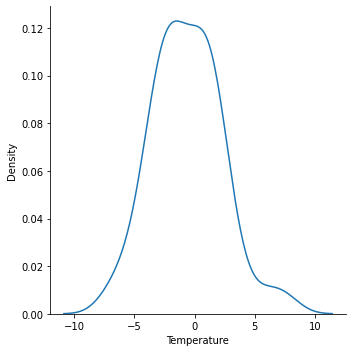

In [135]:
## Distribution of residual are Approximately Normal Distribution
sns.displot(residuals,kind="kde")

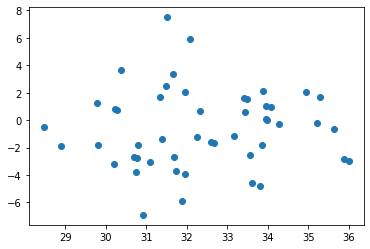

In [136]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(elastic_pred,residuals)

In [137]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(Y_test, lasso_pred))
print(mean_absolute_error(Y_test, lasso_pred))
print(np.sqrt(mean_squared_error(Y_test, lasso_pred)))

8.602713548716657
2.3872137322679707
2.933038279449598


In [138]:


## R Squared
from sklearn.metrics import r2_score
score=r2_score(Y_test, lasso_pred)
print(score)



0.2695177807869328


In [139]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.052347391291155954